In [1]:
import numpy as np
import pandas as pd

import sqlite3
from sqlite3 import Error


import matplotlib.pyplot as plt
import seaborn as sns

import pickle

import nltk

In [2]:
# reading in data from sql database

In [3]:
def createConnection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return conn

conn = createConnection("../data/newsDatabaseAsyncFinal.db")
articlesData = pd.read_sql_query("SELECT * FROM articles", conn, index_col = "id")
conn.close()

In [4]:
# checking data

In [5]:
articlesData.head()

,articleUrl,category,publicationTime,articleContent
id,,,,
1,https://www.rmf24.pl/fakty/polska/news-piontko...,kraj,2019-08-26T18:37:00,Szef MEN odniósł się do informacji podanych p...
2,https://www.rmf24.pl/fakty/polska/news-rzeczni...,kraj,2019-08-26T17:47:28,"Jak podkreślił Müller, Janusz Wojciechowski to..."
3,https://www.rmf24.pl/fakty/polska/news-kto-bed...,kraj,2019-08-26T17:20:00,Z nieoficjalnych rozmów reportera RMF FM z prz...
4,https://www.rmf24.pl/fakty/polska/news-mieszka...,kraj,2019-08-26T17:09:20,Powód to groźne dla zdrowia bakterie - enter...
5,https://www.rmf24.pl/fakty/polska/news-ponad-3...,kraj,2019-08-26T17:01:00,"Filip, Tymon, Zosia, Kaja, Malwina i Nela to p..."


In [6]:
articlesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13037 entries, 1 to 13037
Data columns (total 4 columns):
articleUrl         13037 non-null object
category           13037 non-null object
publicationTime    13037 non-null object
articleContent     13037 non-null object
dtypes: object(4)
memory usage: 509.3+ KB


In [7]:
# first exploration

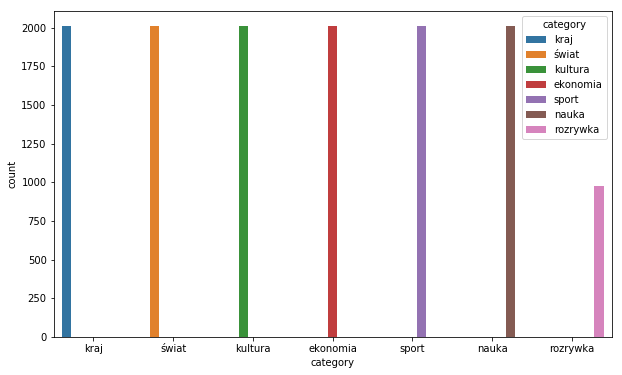

In [8]:
# category counts
plt.figure(figsize=(10,6))
sns.countplot(data = articlesData, x = "category", hue = "category")

In [9]:
# additional column with article length
articlesData["articleLength"] = articlesData["articleContent"].apply(lambda x : len(x))
articlesData["articleLength"].describe()

count    13037.000000
mean      2152.188233
std       2089.508113
min          0.000000
25%        983.000000
50%       1657.000000
75%       2647.000000
max      35743.000000
Name: articleLength, dtype: float64

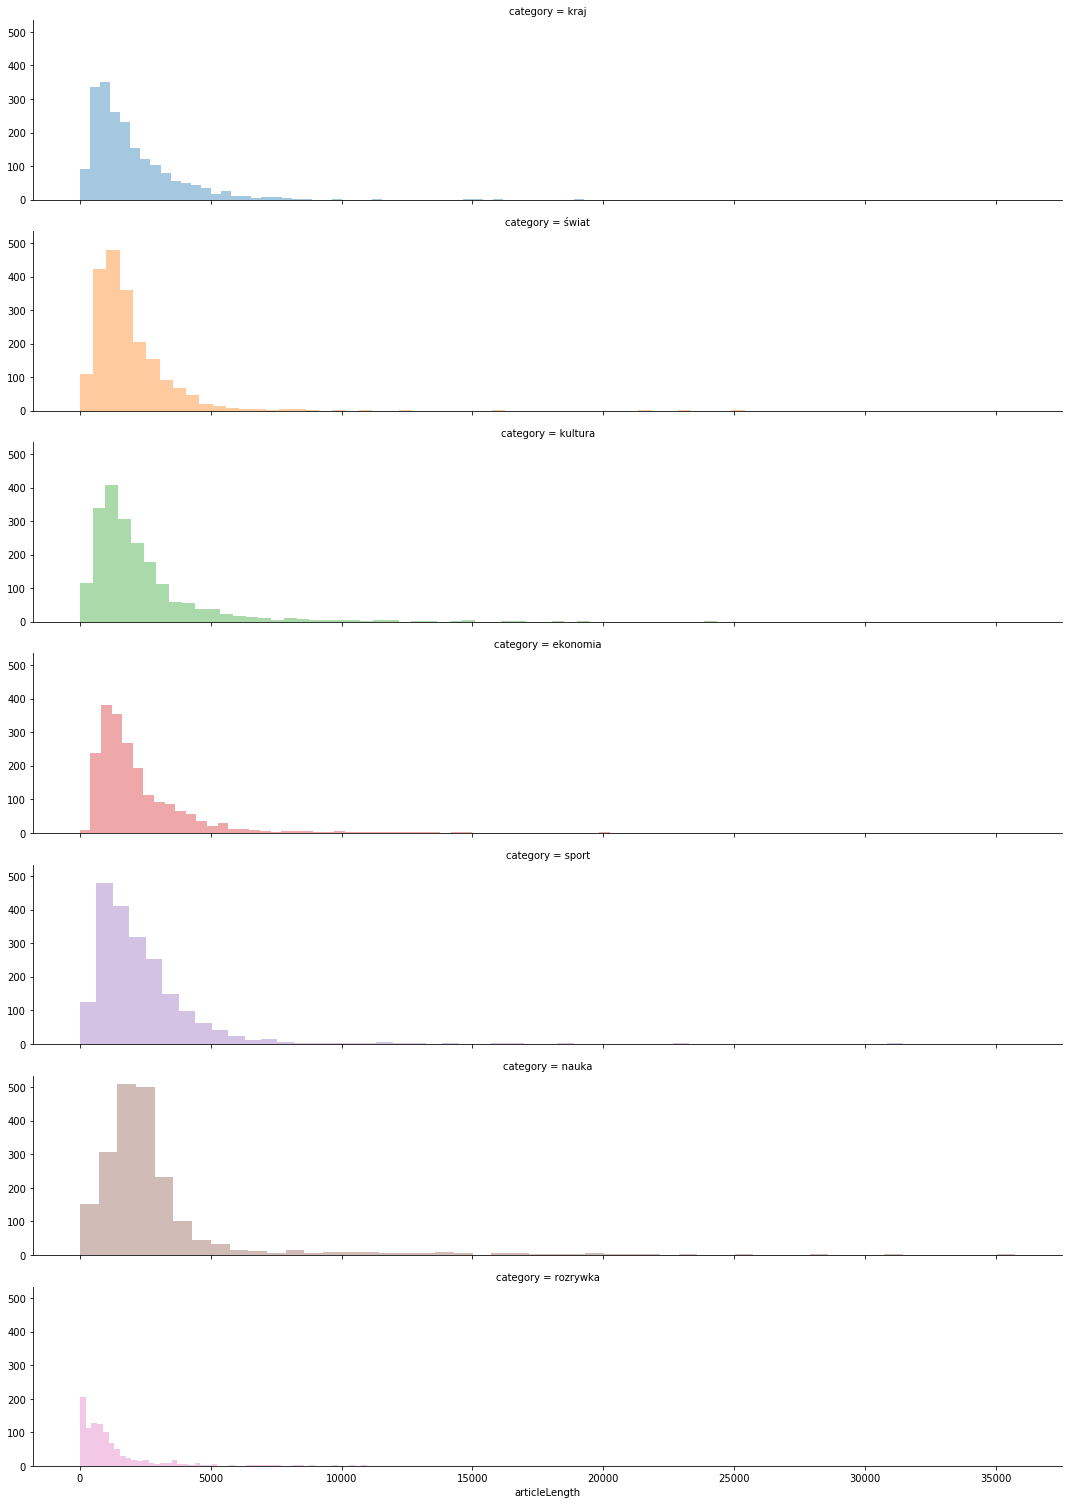

In [10]:
# article lenght per category
g = sns.FacetGrid(articlesData, row="category", hue="category", height = 3, aspect = 5)
g = (g.map(sns.distplot, "articleLength", hist = True, kde = False))

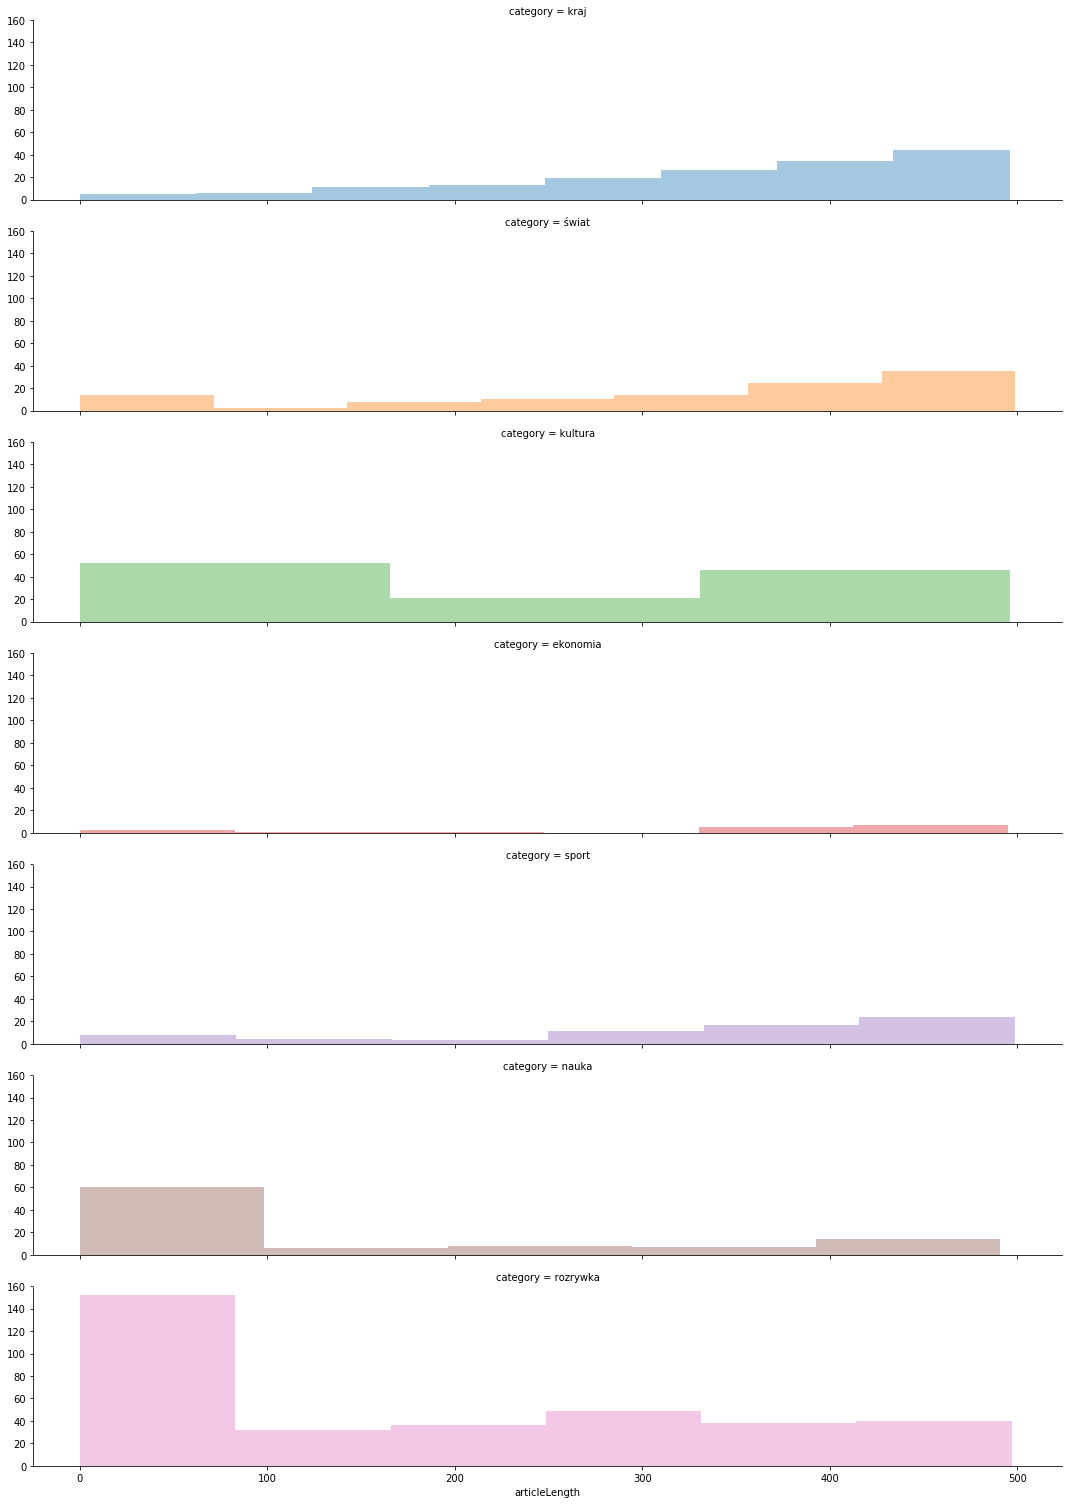

In [11]:
# zoom on marginal values
g = sns.FacetGrid(articlesData[articlesData["articleLength"] < 500], row="category", hue="category", height=3, aspect=5)
g = (g.map(sns.distplot, "articleLength", hist=True, kde=False))

In [12]:
# something strange is going on in length<100 

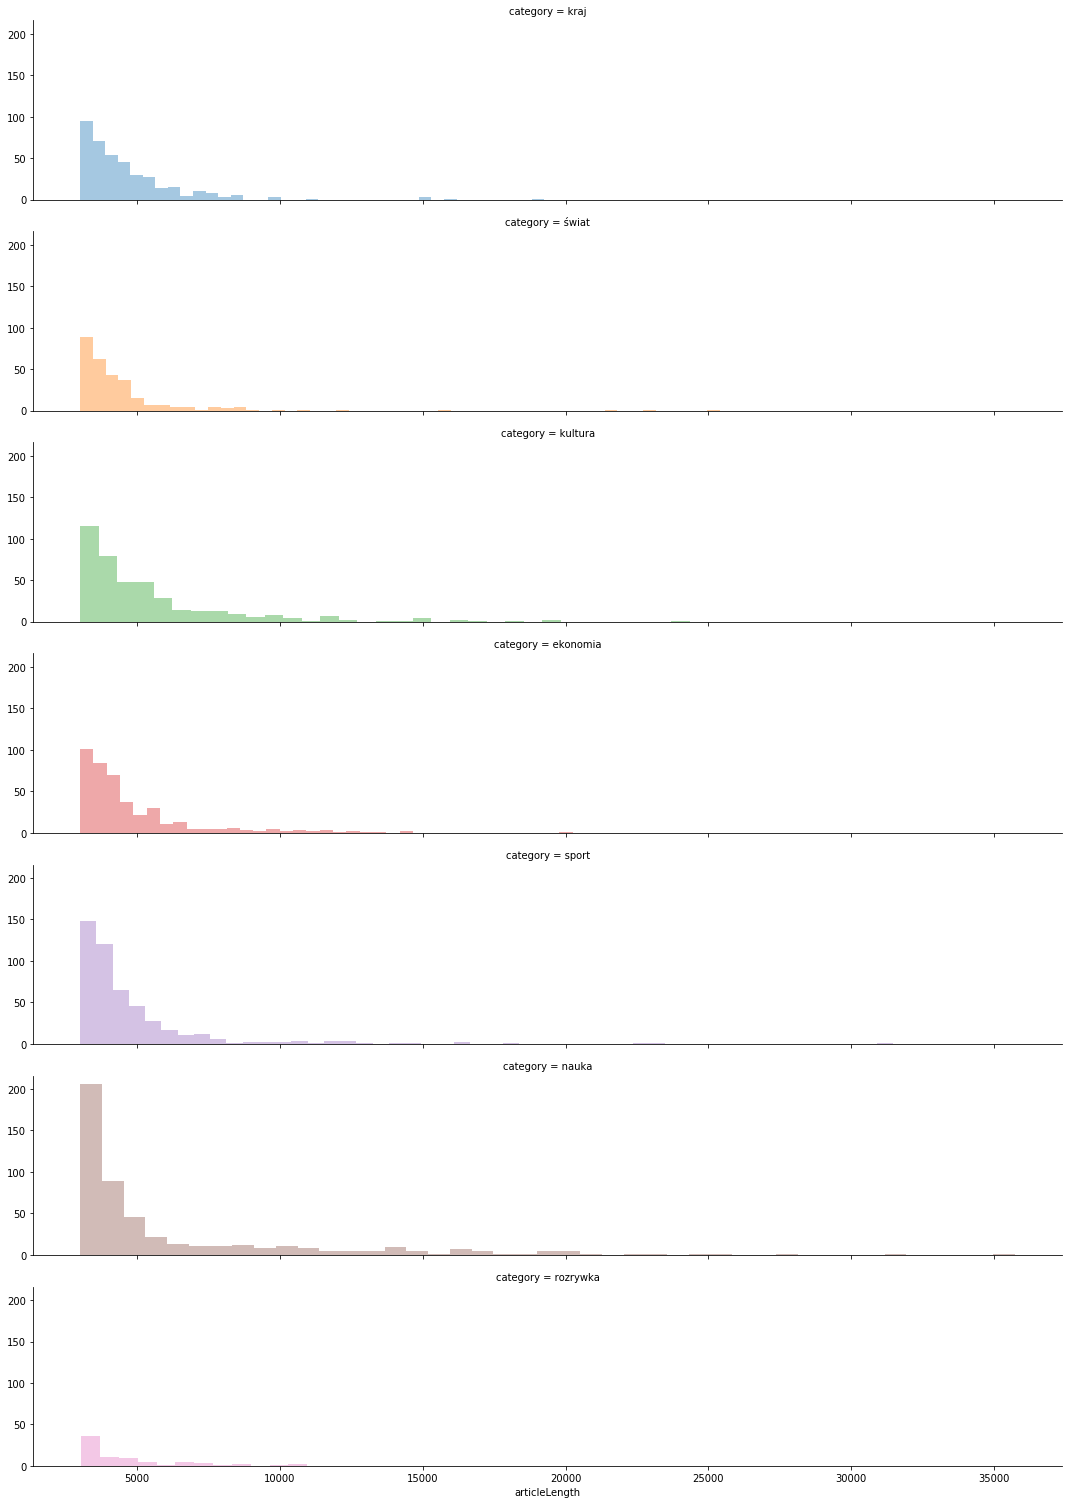

In [13]:
# now, the long tail
g = sns.FacetGrid(articlesData[articlesData["articleLength"] > 3000], row="category", hue="category", height=3, aspect=5)
g = (g.map(sns.distplot, "articleLength", hist=True, kde=False))

In [14]:
# the cut-off in all categories begins around 10K characters

In [15]:
# dropping all articles with less than 100 and more than 10000 characters
print("Articles shorter than 100 chars.: ", len(articlesData[articlesData["articleLength"] < 100]) )
print("Articles longer than 10000 chars.: ", len(articlesData[articlesData["articleLength"] > 10000]) )

Articles shorter than 100 chars.:  293
Articles longer than 10000 chars.:  159


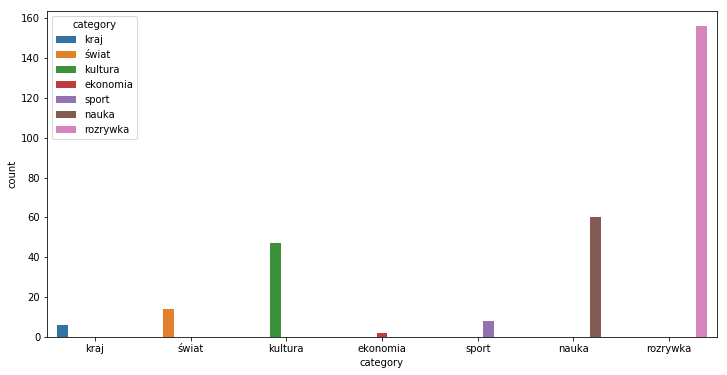

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data = articlesData[articlesData["articleLength"] < 100], x = "category", hue = "category")

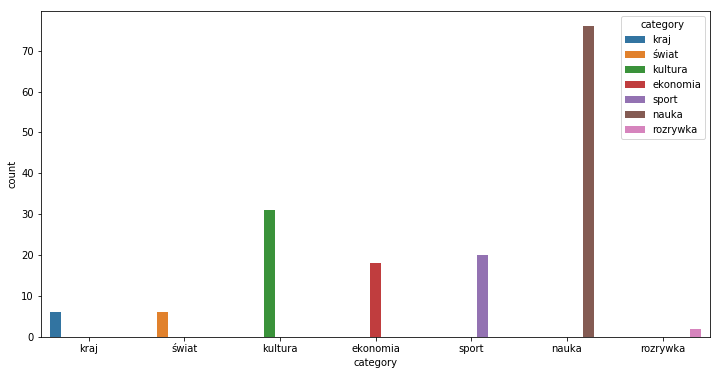

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data = articlesData[articlesData["articleLength"] > 10000], x = "category", hue = "category")

In [18]:
articlesData[articlesData["articleLength"] < 100][["articleContent", "articleLength"]].head(20)

,articleContent,articleLength
id,,
321,Na miejscu jest 10 zastępów straży pożarnej. K...,94
675,,1
691,,0
755,,0
1375,,0
2006,,1
2292,,0
2345,Opracowała: Barbara Stanuch,27
2347,Opracowała: Barbara Stanuch,27


In [19]:
articlesData[articlesData["articleLength"] > 10000][["articleContent", "articleLength"]].head(20)

,articleContent,articleLength
id,,
52,"Przekonywał, że można wyobrazić sobie lepszą P...",15851
730,10-11 sierpnia 2019 r. już po raz siódmy ponad...,19262
757,Rzecznik Praw Dziecka Mikołaj Pawlak w 75. ro...,15169
1276,W Warszawie w tym roku do szkół średnich (lice...,14963
1418,Minister Edukacji Narodowej Dariusz Piontkows...,11295
1659,"Popołudnie 16 maja przy Wiejskiej, drugi dzie...",15108
2825,"Miałem świadomość, że decyzje podejmowane prze...",12402
2886,"Grzegorz Jasiński, RMF FM: W Polsce nieustanni...",22987
2896,"Apokaliptyczne dzieło literackie, drukowane w ...",25398


In [20]:
# removing longer than 10000 and shorter than 100 characters
articlesData = articlesData[(articlesData["articleLength"] < 10000) & (articlesData["articleLength"] > 100)]

In [21]:
# looking only at first sentence of article might be misleading but I'm fine with that for now
articlesData.sample(20)[["category", "articleContent"]]

,category,articleContent
id,,
12205,rozrywka,Film ma trafić do kin w lipcu 2019 roku. Dalsz...
11099,nauka,Polscy badacze zaobserwowali niebieskie gwiazd...
10802,nauka,Międzynarodowy zespół naukowców pod kierunkiem...
10447,nauka,Autorzy pracy przeprowadzili najszerzej zakro...
2646,świat,W tym roku defilada z okazji obchodów Dnia Bas...
4879,kultura,Poruszająca powieść - historia miłości uwikłan...
9581,sport,"Z głębokim smutkiem zawiadamiamy, że Gordon od..."
1786,kraj,Władze Wiosny upoważniły w sobotę lidera parti...
9079,sport,"W oświadczeniu, które pojawiło się na Twitterz..."


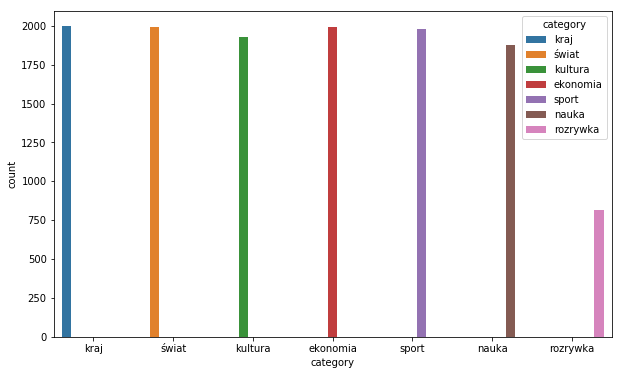

In [22]:
# last category seems to be inbalanced so it may affect the results a bit
plt.figure(figsize=(10,6))
sns.countplot(data = articlesData, x = "category", hue = "category")

In [23]:
# saving DataFrame for further use in modeling part
with open('../data/newsData.pickle', 'wb') as output:
    pickle.dump(articlesData, output)

In [24]:
# removing punktuation and lowering articles 
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+') 

articlesData["articleContent"] = articlesData["articleContent"].apply(lambda content : " ".join(tokenizer.tokenize(content)))
articlesData["articleContent"] = articlesData["articleContent"].apply(lambda content : content.lower())
articlesData["articleContent"].head(20)

id
1     szef men odniósł się do informacji podanych pr...
2     jak podkreślił müller janusz wojciechowski to ...
3     z nieoficjalnych rozmów reportera rmf fm z prz...
4     powód to groźne dla zdrowia bakterie enterokok...
5     filip tymon zosia kaja malwina i nela to pierw...
6     prokuratura na podstawie opinii biegłych zezna...
7     jak poinformowało biuro prasowe wielkopolskiej...
8     faktycznie takie zawiadomienie wpłynęło chodzi...
9     tomasz komenda został skazany na 25 lat pozbaw...
10    dotychczas jak poinformowała w poniedziałek pa...
11    valcyte to jeden z najpopularniejszych leków p...
12    w czerwcu sejmowa komisja spraw zagranicznych ...
13    dziś obraduje prezydium zarządu głównego znp s...
14    ponadstuletni grobowiec z dwiema dobrze zachow...
15    jak powiedział korespondentce rmf fm katarzyni...
16    jak poinformował kom bartosz matuszyk z lidzba...
17    mężczyzna przyjechał do jastrzębia na cotygodn...
18    w sprawie potrącenia zatrzymany został 

In [25]:
# removing stopwords from articles
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/l_sawaniewski/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
# nltk stopwords doesn't include articles language (PL)
# example words for polish: https://pl.wikipedia.org/wiki/Wikipedia:Stopwords

# for now all to do is to copy a file named "polish" containing one word per line into NLTK data directory ~/nltk_data/corpora/stopwords/ 
# sample file: https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt
from nltk.corpus import stopwords

stopwordsPL = list(stopwords.words("polish"))
stopwordsPL[:10]

# adding 2 stopwords specific for the articles source :)
stopwordsPL.append("rmf")
stopwordsPL.append("fm")

In [27]:
articlesData["articleContent"] = articlesData["articleContent"].apply(lambda content : [word for word in content.split(" ") if word not in stopwordsPL])
articlesData["articleContent"] = articlesData["articleContent"].apply(lambda content : " ".join([word for word in content]))
articlesData["articleContent"].head(20)

id
1     szef men odniósł informacji podanych szefa zwi...
2     podkreślił müller janusz wojciechowski wielole...
3     nieoficjalnych rozmów reportera przedstawiciel...
4     powód groźne zdrowia bakterie enterokoki wykry...
5     filip tymon zosia kaja malwina nela pierwsze p...
6     prokuratura podstawie opinii biegłych zeznań ś...
7     poinformowało biuro prasowe wielkopolskiej pol...
8     faktycznie zawiadomienie wpłynęło chodzi ewent...
9     tomasz komenda skazany 25 pozbawienia wolności...
10    dotychczas poinformowała poniedziałek pap rzec...
11    valcyte najpopularniejszych leków przeciwwirus...
12    czerwcu sejmowa komisja spraw zagranicznych po...
13    obraduje prezydium zarządu głównego znp szef z...
14    ponadstuletni grobowiec dwiema zachowanymi tru...
15    powiedział korespondentce katarzynie szymański...
16    poinformował kom bartosz matuszyk lidzbarskiej...
17    mężczyzna przyjechał jastrzębia cotygodniowe s...
18    sprawie potrącenia zatrzymany 45 latek 

In [28]:
# lemmatisation using Morfeusz2 (more info: http://download.sgjp.pl/morfeusz/Morfeusz2.pdf)
from morfeusz2 import Morfeusz
morf = Morfeusz()

In [29]:
print("Text before lemmatisation: \n-----")
print(articlesData["articleContent"].iloc[0])

Text before lemmatisation: 
-----
szef men odniósł informacji podanych szefa związku nauczycielstwa polskiego sławomira broniarza 16 września zaplanowanych dniach 1 15 września konsultacjach sondażu podana decyzja dotycząca ewentualnego strajku szkołach skoro broniarz zamierza prowadzić konsultacje znaczy pewny strajk ogóle miał poparcie wśród nauczycieli pewny większość nauczycieli chce protestu żadnego zastanowienia mówił początku września protest wybuchnie powiedział piontkowski minister ocenił obecnie porównaniu kwietnia strajk szkołach emocje wśród nauczycieli troszeczkę opadły nadzieję nauczyciele dostrzegli wzrastają wynagrodzenia wrześniu kolejne 10 proc nadzieję doceniają stanowisko ministerstwa całego rządu wyraźnie mówi lepiej rozmawiać spierać ostro takim konflikcie społecznym mówił piontkowski szef men zwrócił uwagę wątpliwości budzą kwestie formalno prawne związane ewentualnymi dalszymi protestami szkołach wskazał wypowiedzi szefa forum związków zawodowych odpowiadającego

In [30]:
def morfLemats(text, morf):
    analysis = morf.analyse(text)
    lemats = []
    lineCount = 0
    for line in analysis:
        if line[0] == lineCount:
            lineCount += 1
            lemats.append(line[2][1])
            
    return " ".join(lemats)

In [31]:
articlesData["articleContent"] = articlesData["articleContent"].apply(lambda text : morfLemats(text, morf))

In [32]:
print("Text after lemmatisation: \n-----")
print(articlesData["articleContent"].iloc[0])

Text after lemmatisation: 
-----
szef MEN odnieść informacja podać szef związek nauczycielstwo polski:a Sławomira Broniarz:s2 16 września zaplanować dzień:s1 1 15 września konsultacja sondaż podać decyzja dotyczyć ewentualny strajk szkoła skoro:d Broniarz:s2 zamierzać prowadzić konsultacja znaczyć pewny:a1 strajk ogół mieć poparcie wśród nauczyciel pewny:a1 większość nauczyciel chcieć protest żaden zastanowienie mówić początek września protest wybuchnąć powiedzieć Piontkowski minister ocenić obecnie porównanie kwietni strajk szkoła emocja wśród nauczyciel troszeczka opadły nadziać nauczyciel dostrzec wzrastać wynagrodzenie wrzesień kolejny 10 proca nadziać doceniać stanowisko ministerstwo cały rząd:s1 wyraźnie mówić dobrze rozmawiać spierać ostro taki:a konflikt społeczny mówić Piontkowski szef MEN zwrócić uwaga wątpliwość budzić kwestia formalno prawny związać ewentualny daleki protest szkoła wskazać wypowiedź szef forum związek zawodowy odpowiadać oświata obecny:a przepis mówić minis

In [33]:
# does the most common words say anything about article category?
from wordcloud import WordCloud

kraj


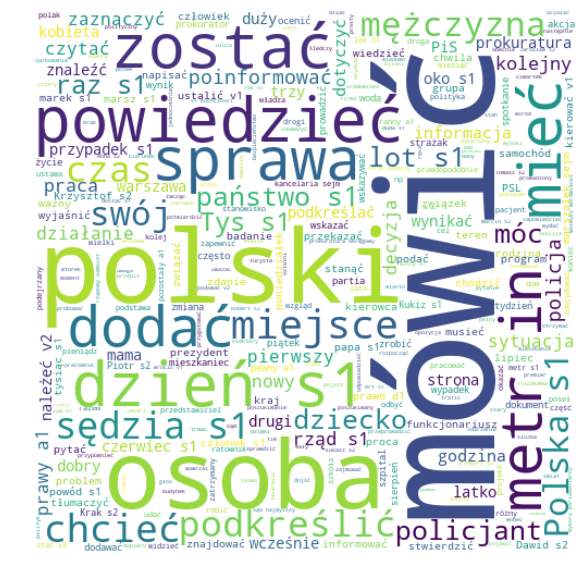

świat


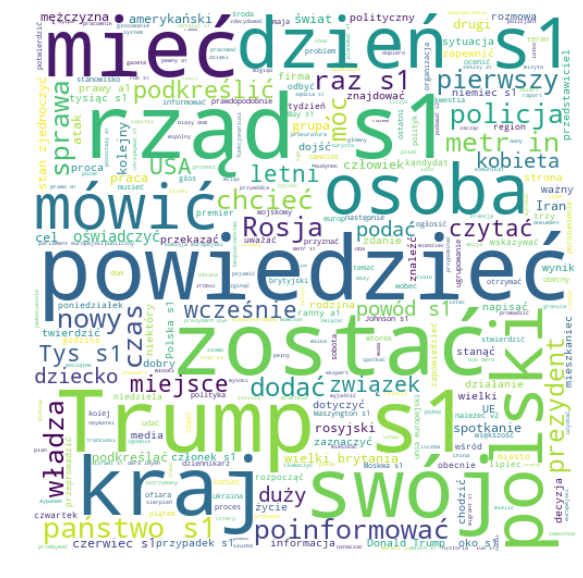

kultura


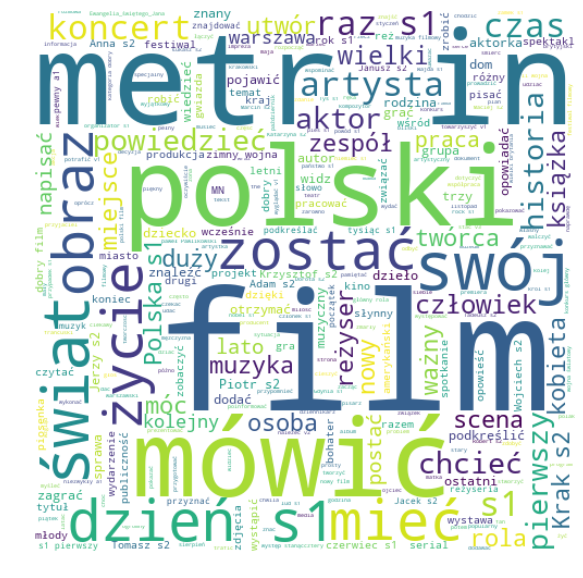

ekonomia


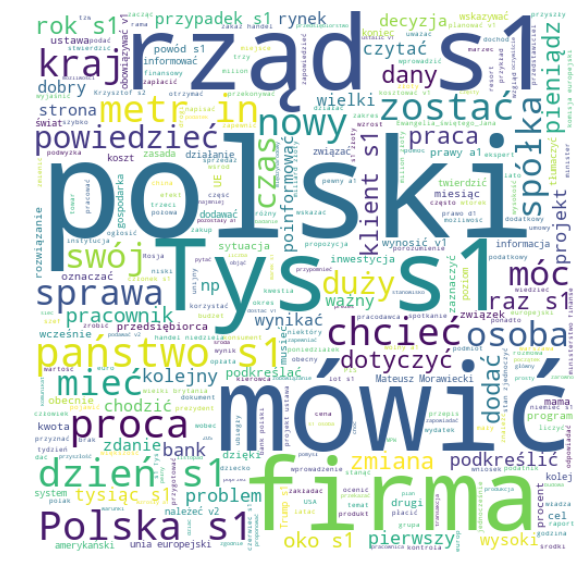

sport


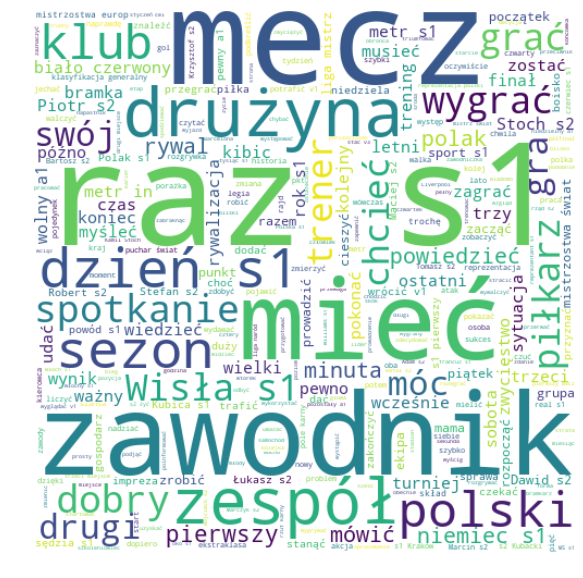

nauka


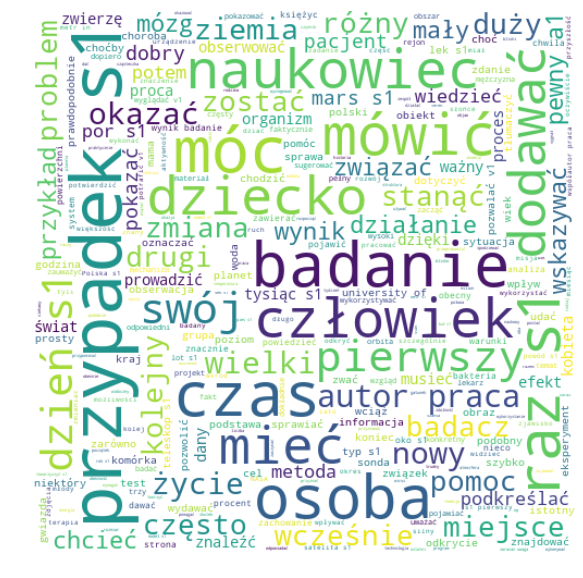

rozrywka


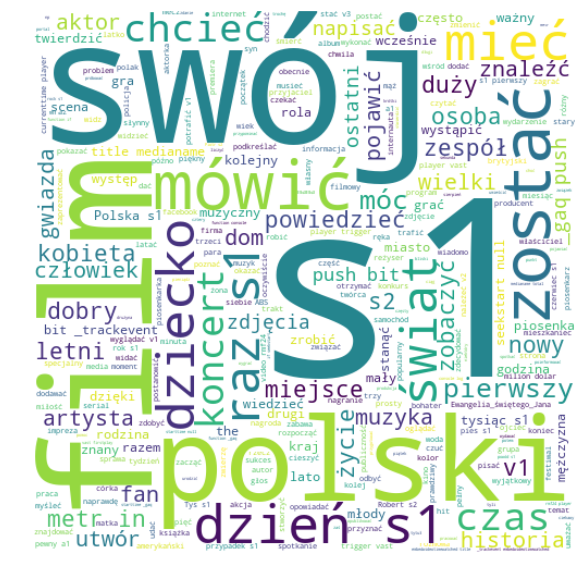

In [34]:
for category in articlesData["category"].unique():
    print(category)

    categoryContent = " ".join([text for text in articlesData["articleContent"][articlesData["category"] == category] ])

    wordcloud = WordCloud(background_color="white", width = 500, height = 500, max_words = 300, stopwords = stopwordsPL).generate(categoryContent)

    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [35]:
# there are some "typicall" words for news articles but most categories are pretty clear

# seems that last category still has some problems (I guess some scraping errors) and maybe it shoud be dropped for good

In [36]:
# there is one thing noticed during this analysis - article urls (part of it) hide slightly different caterories 
# than scraped ones 
print("Example urls: {}".format(articlesData["articleUrl"].sample(5).values))

Example urls: ['https://www.rmf24.pl/nauka/news-usmiech-mony-lisy-byl-udawany,nId,3030539'
 'https://www.rmf24.pl/sport/news-pracownicy-ruchu-chorzow-zakonczyli-strajk,nId,3127801'
 'https://www.rmf24.pl/kultura/news-piosenka-z-prawdziwego-zdarzenia-tomasz-organek-o-halasie,nId,3042360'
 'https://www.rmf24.pl/ekonomia/news-rzad-chce-powolac-rzecznika-praw-podatnika,nId,3013065'
 'https://www.rmf24.pl/nauka/news-gen-ktory-pomaga-odzyskac-wzrok-na-razie-u-myszy,nId,2885942']


In [37]:
articlesData["articleUrl"].apply(lambda url : url.split("/")[3]).value_counts()

fakty                                                                            3806
kultura                                                                          2003
ekonomia                                                                         1810
nauka                                                                            1598
sport                                                                            1535
raporty                                                                           994
rozrywka                                                                          405
aktualnosci                                                                       100
ciekawostki                                                                        67
czlowiek                                                                           65
tylko-w-rmf24                                                                      44
choroby                                               